In [4]:
import sys
!{sys.executable} -m pip install --upgrade matplotlib
!{sys.executable} -m pip install --upgrade sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2342 sha256=bd6535c583e91a01d957ff4a1d40cd324a5bb2ec7307afdecf8813fb7285d305
  Stored in directory: /home/hadoop/.cache/pip/wheels/db/9f/0b/772886b624f84c138a5febb6966c89d374ab58c62bd65d109e
Successfully built sklearn


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  4 18:16:40 2021

@author: pmarc
Résolution Problème L08 - #1 par Pierre-Marc Juneau, 8 avril 2021

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity


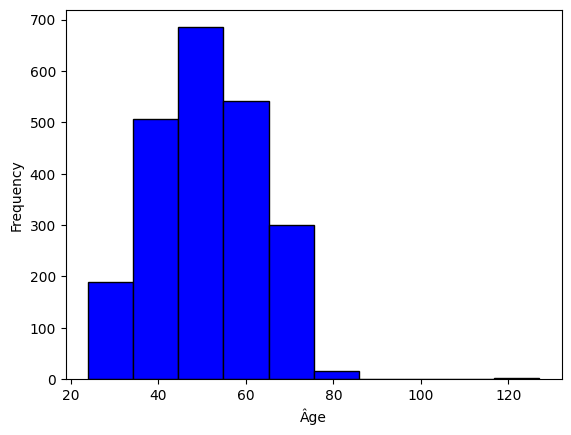

In [11]:

donnee = pd.read_csv('../Fichiers/DonneesMarketingv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)


"Question 1"

ax=donnee["Âge"].plot.hist(density=False, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")

d=1000
grille_x = np.linspace(donnee["Âge"].min()-10, donnee["Âge"].max()+10, d)
dx=(donnee["Âge"].max()+10-(donnee["Âge"].min()-10))/(d-1)
Age_valeurs=donnee["Âge"].values.reshape(-1, 1)

### distribuicao
kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(Age_valeurs)
pdf = np.exp(kde.score_samples(grille_x.reshape(-1, 1)))
cdf = np.cumsum(pdf*dx)


0.999883026907544


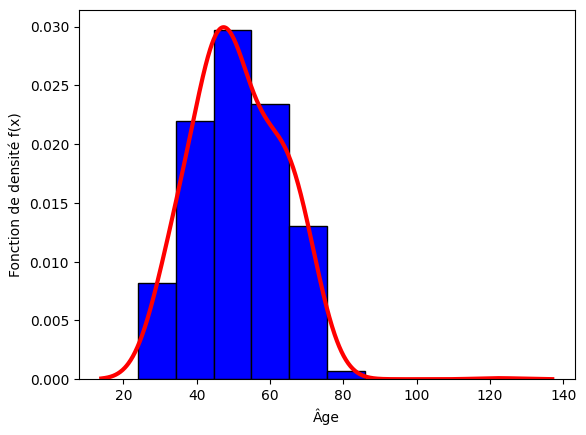

In [7]:
## sobrepoe a linha no grafico anterior
fig, ax = plt.subplots()
ax=donnee["Âge"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")

#### deve ser próx de 1
print((pdf*dx).sum())


In [12]:
### acumula cdf, pdf e coluna de interesse num dataframe
grille_x_pd=pd.DataFrame(grille_x)
grille_x_pd.columns=["Âges"]
pdf_pd=pd.DataFrame(pdf)
pdf_pd.columns=["PDF"]
cdf_pd=pd.DataFrame(cdf)
cdf_pd.columns=["CDF"]
DistAge=pd.concat([grille_x_pd,pdf_pd,cdf_pd],axis=1)

### probabilidades
Prob_moins_33=DistAge["PDF"][DistAge["Âges"]<=33].sum()*dx

Prob_moins_53=DistAge["PDF"][DistAge["Âges"]<=53].sum()*dx

Prob_moins_100=DistAge["PDF"][DistAge["Âges"]<=100].sum()*dx


In [13]:
### Bayes

"Question 2"

Revenus_sup_60000 = donnee[(donnee["Revenus"] >= 60000)]

Achats_Joaillerie_sup_100 = donnee[(donnee["Joaillerie ($/2sem)"] >= 100)]

Revenus_sup_60000_et_Joaillerie_plus_100=donnee[(donnee["Revenus"] >= 60000) & (donnee["Joaillerie ($/2sem)"] >= 100)]

PA=Achats_Joaillerie_sup_100.shape[0]/donnee.shape[0]
PB=Revenus_sup_60000.shape[0]/donnee.shape[0]
PB_A=Revenus_sup_60000_et_Joaillerie_plus_100.shape[0]/Achats_Joaillerie_sup_100.shape[0]

Prob_A_B=PB_A*PA/PB

Prob_A_B_théo=Revenus_sup_60000_et_Joaillerie_plus_100.shape[0]/Revenus_sup_60000.shape[0]

